In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import extractor as ext

In [2]:
fbase = pd.read_csv('./1_filtered.csv', header=None)
fbase.head()

,0,1,2,3
0,8.456798,-4.466378,7.215951,0.019221
1,8.454815,-4.464132,7.212556,0.019295
2,8.453542,-4.461002,7.207107,0.019680
3,8.449433,-4.457170,7.201194,0.020556
4,8.440568,-4.453560,7.195996,0.020409


In [3]:
extractor = ext.RecordExtractor(norm=True) # set 0 as first item
cycles = extractor.read_sample(fbase)
np.array(cycles).shape

(4, 5)

In [4]:
import dataset_creation as dtc

ds, offsetted_ds = dtc.create_dataset(fbase)

In [5]:
offsetted_ds.head(10)

,class,SENSOR0_RMS,SENSOR0_WAVELEN,SENSOR0_WAMP,SENSOR0_APPEN,SENSOR0_SAMPEN,SENSOR0_MAV,SENSOR1_RMS,SENSOR1_WAVELEN,SENSOR1_WAMP,...,SENSOR2_WAMP,SENSOR2_APPEN,SENSOR2_SAMPEN,SENSOR2_MAV,SENSOR3_RMS,SENSOR3_WAVELEN,SENSOR3_WAMP,SENSOR3_APPEN,SENSOR3_SAMPEN,SENSOR3_MAV
0,rest,0.031721,5.290727,183,0.687755,0.673635,0.022882,0.032332,6.344441,239,...,33,0.827534,0.790555,0.008300,0.006577,1.331569,14,0.692217,0.694896,0.004631
1,rest,0.329310,68.088999,551,0.804787,0.854764,0.250718,0.220837,53.653859,544,...,494,0.888368,0.991344,0.082046,0.005762,1.052785,3,0.665619,0.592555,0.004100
2,rest,0.027455,4.663072,160,0.717929,0.650282,0.019970,0.031108,5.117540,177,...,37,0.708882,0.540071,0.008646,0.008711,1.521693,21,0.588848,0.555126,0.005797
3,rest,0.029670,5.420028,221,0.806095,0.838035,0.022624,0.096273,29.152339,510,...,28,0.968759,1.016914,0.007080,0.002769,0.558625,0,0.727780,0.771089,0.002001
4,rest,0.027632,4.863877,192,0.773586,0.799442,0.021730,0.030898,6.184191,231,...,54,0.905771,0.906427,0.010075,0.002259,0.551961,0,0.899880,0.991343,0.001859
5,extension,0.025401,4.794994,169,0.802546,0.819637,0.019949,0.032507,6.670871,236,...,38,0.977281,0.913623,0.008109,0.002997,0.683662,0,0.832709,0.866739,0.002394
6,extension,0.031228,5.998265,242,0.852760,0.857308,0.024281,0.039656,8.262643,287,...,62,1.029031,1.098793,0.009095,0.004319,0.868333,0,0.767640,0.793087,0.003196
7,extension,0.040748,8.260454,325,0.887827,0.929754,0.032016,0.055694,10.656382,365,...,113,0.915409,0.899020,0.014855,0.005250,1.104111,0,0.818243,0.867035,0.004200
8,extension,0.025068,4.995668,185,0.834873,0.849186,0.019954,0.033090,7.341752,291,...,53,0.992684,1.045802,0.009363,0.003023,0.691040,0,0.864963,0.944491,0.002383
9,extension,0.023238,5.474555,205,0.922462,0.978904,0.017589,0.026964,5.579715,228,...,67,1.100858,1.257615,0.008165,0.007759,1.599790,10,0.746533,0.774075,0.005682


In [6]:
fbase2 = pd.read_csv('./2_filtered.csv', header=None)
fbase3 = pd.read_csv('./3_filtered.csv', header=None)


_, ds_2 = dtc.create_dataset(fbase2)
_, ds_3 = dtc.create_dataset(fbase3)

In [7]:
full_ds = pd.concat([offsetted_ds, ds_2, ds_3])
full_ds

,class,SENSOR0_RMS,SENSOR0_WAVELEN,SENSOR0_WAMP,SENSOR0_APPEN,SENSOR0_SAMPEN,SENSOR0_MAV,SENSOR1_RMS,SENSOR1_WAVELEN,SENSOR1_WAMP,...,SENSOR2_WAMP,SENSOR2_APPEN,SENSOR2_SAMPEN,SENSOR2_MAV,SENSOR3_RMS,SENSOR3_WAVELEN,SENSOR3_WAMP,SENSOR3_APPEN,SENSOR3_SAMPEN,SENSOR3_MAV
0,rest,0.031721,5.290727,183,0.687755,0.673635,0.022882,0.032332,6.344441,239,...,33,0.827534,0.790555,0.008300,0.006577,1.331569,14,0.692217,0.694896,0.004631
1,rest,0.329310,68.088999,551,0.804787,0.854764,0.250718,0.220837,53.653859,544,...,494,0.888368,0.991344,0.082046,0.005762,1.052785,3,0.665619,0.592555,0.004100
2,rest,0.027455,4.663072,160,0.717929,0.650282,0.019970,0.031108,5.117540,177,...,37,0.708882,0.540071,0.008646,0.008711,1.521693,21,0.588848,0.555126,0.005797
3,rest,0.029670,5.420028,221,0.806095,0.838035,0.022624,0.096273,29.152339,510,...,28,0.968759,1.016914,0.007080,0.002769,0.558625,0,0.727780,0.771089,0.002001
4,rest,0.027632,4.863877,192,0.773586,0.799442,0.021730,0.030898,6.184191,231,...,54,0.905771,0.906427,0.010075,0.002259,0.551961,0,0.899880,0.991343,0.001859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,pronation,0.030206,5.518621,191,0.751244,0.761140,0.022158,0.040091,8.376067,303,...,17,0.661933,0.606462,0.016791,0.004540,0.886658,0,0.744321,0.719639,0.003487
46,pronation,0.202796,39.717625,546,0.819652,0.861454,0.158956,0.216026,47.217432,548,...,6,0.536482,0.487924,0.018160,0.002153,0.424398,0,0.800815,0.827587,0.001619
47,pronation,0.107478,20.551229,478,0.824538,0.843645,0.080985,0.122458,25.783197,492,...,121,0.725848,0.708992,0.024602,0.009298,1.950349,17,0.761951,0.818972,0.007312
48,pronation,0.042113,6.958032,267,0.747249,0.730523,0.031823,0.049149,9.963021,329,...,35,0.675932,0.637735,0.016463,0.003871,0.759703,1,0.648493,0.674529,0.002837


In [8]:
full_ds['class'].unique()

array(['rest', 'extension', 'flexion', 'ulnar_deviation',
       'radial_deviation', 'grip', 'finger_abduction', 'finger_adduction',
       'supination', 'pronation'], dtype=object)

In [9]:
full_ds.loc[full_ds['class'] == 'rest' ].describe()

,SENSOR0_RMS,SENSOR0_WAVELEN,SENSOR0_WAMP,SENSOR0_APPEN,SENSOR0_SAMPEN,SENSOR0_MAV,SENSOR1_RMS,SENSOR1_WAVELEN,SENSOR1_WAMP,SENSOR1_APPEN,...,SENSOR2_WAMP,SENSOR2_APPEN,SENSOR2_SAMPEN,SENSOR2_MAV,SENSOR3_RMS,SENSOR3_WAVELEN,SENSOR3_WAMP,SENSOR3_APPEN,SENSOR3_SAMPEN,SENSOR3_MAV
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.109270,26.477712,327.666667,0.854697,0.891956,0.084613,0.094603,22.630999,368.666667,0.881500,...,115.666667,0.838506,0.839373,0.022969,0.027850,5.760624,76.466667,0.741772,0.769586,0.021092
std,0.121294,31.382996,181.176578,0.117959,0.179667,0.094976,0.078711,20.213763,159.759492,0.096594,...,162.794203,0.088006,0.140185,0.028763,0.059112,12.334838,180.847555,0.085278,0.129565,0.045093
min,0.014144,2.925224,72.000000,0.687755,0.650282,0.010882,0.028184,4.718717,149.000000,0.699833,...,11.000000,0.686334,0.540071,0.007080,0.001803,0.369198,0.000000,0.588848,0.555126,0.001419
25%,0.027544,5.077302,187.500000,0.770421,0.804818,0.021015,0.031720,6.264316,219.500000,0.829047,...,26.000000,0.771087,0.759919,0.009426,0.003592,0.778165,0.000000,0.681546,0.695464,0.002761
50%,0.038560,6.941829,271.000000,0.813462,0.838035,0.029487,0.058505,12.208738,359.000000,0.865274,...,54.000000,0.844929,0.821914,0.012073,0.006097,1.180048,3.000000,0.730757,0.761631,0.004323
75%,0.183762,48.312846,544.500000,0.925882,1.003562,0.147495,0.132356,30.486870,517.000000,0.949637,...,108.500000,0.897069,0.966275,0.015719,0.009199,1.731154,23.000000,0.783927,0.846220,0.006505
max,0.355839,86.755327,573.000000,1.059118,1.186294,0.283125,0.253018,63.644237,556.000000,1.046055,...,514.000000,0.968759,1.021421,0.102921,0.178515,40.239700,526.000000,0.899880,0.991343,0.136773


In [10]:
full_ds.loc[full_ds['class'] == 'extension'].describe()

,SENSOR0_RMS,SENSOR0_WAVELEN,SENSOR0_WAMP,SENSOR0_APPEN,SENSOR0_SAMPEN,SENSOR0_MAV,SENSOR1_RMS,SENSOR1_WAVELEN,SENSOR1_WAMP,SENSOR1_APPEN,...,SENSOR2_WAMP,SENSOR2_APPEN,SENSOR2_SAMPEN,SENSOR2_MAV,SENSOR3_RMS,SENSOR3_WAVELEN,SENSOR3_WAMP,SENSOR3_APPEN,SENSOR3_SAMPEN,SENSOR3_MAV
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.052507,11.843246,285.533333,0.896296,0.927384,0.040426,0.062398,13.180733,339.866667,0.882010,...,85.466667,0.877752,0.888236,0.014561,0.005879,1.220195,6.733333,0.762155,0.796906,0.004439
std,0.049469,11.959530,145.748250,0.076533,0.090005,0.037835,0.045074,9.372664,113.559215,0.063536,...,57.293563,0.135750,0.177308,0.005368,0.002715,0.553820,11.689230,0.050863,0.067885,0.002007
min,0.010633,2.211277,31.000000,0.800666,0.815352,0.008682,0.024140,5.113159,202.000000,0.748768,...,11.000000,0.579390,0.516315,0.007886,0.002324,0.467610,0.000000,0.667715,0.712456,0.001761
25%,0.025254,5.106669,188.500000,0.835295,0.844791,0.019951,0.032798,6.619196,237.000000,0.858840,...,42.000000,0.795278,0.801340,0.009229,0.003671,0.779687,0.000000,0.730975,0.742315,0.002795
50%,0.028964,6.425028,242.000000,0.887827,0.933161,0.022462,0.055359,10.482100,291.000000,0.876788,...,67.000000,0.907941,0.899020,0.014855,0.005657,1.170371,1.000000,0.757917,0.793087,0.004223
75%,0.060366,12.305261,387.500000,0.949318,0.993390,0.046757,0.068391,16.335012,443.000000,0.918117,...,115.500000,0.962238,0.962931,0.018227,0.007348,1.543455,8.000000,0.784745,0.846976,0.005432
max,0.166051,43.030884,546.000000,1.047646,1.080404,0.126347,0.193115,38.573636,538.000000,1.002815,...,231.000000,1.100858,1.257615,0.023537,0.010932,2.319123,38.000000,0.864963,0.944491,0.008379


In [11]:
full_ds.loc[full_ds['class'] == 'flexion'].describe()

,SENSOR0_RMS,SENSOR0_WAVELEN,SENSOR0_WAMP,SENSOR0_APPEN,SENSOR0_SAMPEN,SENSOR0_MAV,SENSOR1_RMS,SENSOR1_WAVELEN,SENSOR1_WAMP,SENSOR1_APPEN,...,SENSOR2_WAMP,SENSOR2_APPEN,SENSOR2_SAMPEN,SENSOR2_MAV,SENSOR3_RMS,SENSOR3_WAVELEN,SENSOR3_WAMP,SENSOR3_APPEN,SENSOR3_SAMPEN,SENSOR3_MAV
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.085188,20.117757,305.000000,0.860188,0.889795,0.064497,0.098316,23.600474,339.000000,0.843898,...,97.733333,0.821438,0.812798,0.019256,0.008841,1.748373,30.533333,0.723021,0.745069,0.006353
std,0.087113,22.024069,194.084297,0.115185,0.172320,0.065123,0.096107,25.619903,173.912129,0.106267,...,145.092811,0.099592,0.146226,0.024489,0.011834,2.425767,84.499253,0.101407,0.146672,0.008436
min,0.019102,3.073469,78.000000,0.705668,0.639410,0.014784,0.019284,3.338539,109.000000,0.689208,...,1.000000,0.673374,0.608488,0.007136,0.001211,0.260755,0.000000,0.515082,0.463032,0.000986
25%,0.024674,4.530083,147.500000,0.771615,0.764988,0.018651,0.030237,5.512788,195.000000,0.745431,...,18.500000,0.740026,0.675842,0.008882,0.004027,0.794940,0.000000,0.657274,0.654455,0.002840
50%,0.032057,5.897767,217.000000,0.810976,0.824434,0.025101,0.041641,7.982309,270.000000,0.858122,...,36.000000,0.798038,0.788665,0.010704,0.005927,0.912124,3.000000,0.692162,0.718057,0.003587
75%,0.158011,41.617927,545.000000,0.970930,1.040412,0.120061,0.163083,40.502364,525.000000,0.933264,...,88.000000,0.886514,0.942168,0.013328,0.008468,1.665466,13.500000,0.827951,0.880496,0.006420
max,0.288022,66.824307,553.000000,1.097223,1.243194,0.211892,0.289265,76.007321,564.000000,0.995526,...,502.000000,0.972029,1.049948,0.098706,0.050121,10.239082,331.000000,0.853624,0.949611,0.035687


In [12]:
def remove_outliers(ds, col):
    Q1 = ds[col].quantile(0.25)
    Q3 = ds[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return ds[(ds[col] >= lower_bound) & (ds[col] <= upper_bound)]

In [13]:
rest_ds = full_ds.loc[full_ds['class'] == 'rest']

rest_ds = remove_outliers(rest_ds, 'SENSOR0_RMS')
rest_ds = remove_outliers(rest_ds, 'SENSOR1_RMS')
rest_ds = remove_outliers(rest_ds, 'SENSOR2_RMS')
rest_ds = remove_outliers(rest_ds, 'SENSOR3_RMS')
rest_ds.shape

(11, 25)

In [14]:
extension_ds = full_ds.loc[full_ds['class'] == 'extension']

extension_ds = remove_outliers(extension_ds, 'SENSOR0_RMS')
extension_ds = remove_outliers(extension_ds, 'SENSOR1_RMS')
extension_ds = remove_outliers(extension_ds, 'SENSOR2_RMS')
extension_ds = remove_outliers(extension_ds, 'SENSOR3_RMS')
extension_ds.shape

(12, 25)

In [15]:
flexion_ds = full_ds.loc[full_ds['class'] == 'flexion']

flexion_ds = remove_outliers(flexion_ds, 'SENSOR0_RMS')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR1_RMS')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR2_RMS')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR3_RMS')
flexion_ds.shape

(11, 25)

In [16]:
cleansed_ds = pd.concat([rest_ds, extension_ds, flexion_ds])
cleansed_ds.head()

,class,SENSOR0_RMS,SENSOR0_WAVELEN,SENSOR0_WAMP,SENSOR0_APPEN,SENSOR0_SAMPEN,SENSOR0_MAV,SENSOR1_RMS,SENSOR1_WAVELEN,SENSOR1_WAMP,...,SENSOR2_WAMP,SENSOR2_APPEN,SENSOR2_SAMPEN,SENSOR2_MAV,SENSOR3_RMS,SENSOR3_WAVELEN,SENSOR3_WAMP,SENSOR3_APPEN,SENSOR3_SAMPEN,SENSOR3_MAV
0,rest,0.031721,5.290727,183,0.687755,0.673635,0.022882,0.032332,6.344441,239,...,33,0.827534,0.790555,0.008300,0.006577,1.331569,14,0.692217,0.694896,0.004631
2,rest,0.027455,4.663072,160,0.717929,0.650282,0.019970,0.031108,5.117540,177,...,37,0.708882,0.540071,0.008646,0.008711,1.521693,21,0.588848,0.555126,0.005797
3,rest,0.029670,5.420028,221,0.806095,0.838035,0.022624,0.096273,29.152339,510,...,28,0.968759,1.016914,0.007080,0.002769,0.558625,0,0.727780,0.771089,0.002001
4,rest,0.027632,4.863877,192,0.773586,0.799442,0.021730,0.030898,6.184191,231,...,54,0.905771,0.906427,0.010075,0.002259,0.551961,0,0.899880,0.991343,0.001859
0,rest,0.026648,6.941829,278,1.059118,1.169401,0.020284,0.058505,12.208738,359,...,112,0.879260,0.943344,0.015287,0.003942,0.889452,0,0.876679,0.940732,0.003140


In [17]:
def get_score_and_accuracy(X, Y):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,test_size=0.2)

    encoder = LabelEncoder()

    Y_train = encoder.fit_transform(Y_train)
    Y_test = encoder.transform(Y_test)

    model = KNeighborsClassifier()
    model.fit(X_train, Y_train)
    preds_valid = model.predict(X_test)

    dr = {} 
    dr['model'] = 'KNN'
    dr['MAE'] = mean_absolute_error(Y_test, preds_valid)
    dr['ACC'] = accuracy_score(Y_test, preds_valid)


    model = SVC()
    model.fit(X_train, Y_train)
    preds_valid = model.predict(X_test)

    dr_svm = {} 
    dr_svm['model'] = 'SVM'
    dr_svm['MAE'] = mean_absolute_error(Y_test, preds_valid)
    dr_svm['ACC'] = accuracy_score(Y_test, preds_valid)

    model = DecisionTreeClassifier()
    model.fit(X_train, Y_train)

    preds_valid = model.predict(X_test)

    dr_tree = {} 
    dr_tree['model'] = 'Tree Classifier'
    dr_tree['MAE'] = mean_absolute_error(Y_test, preds_valid)
    dr_tree['ACC'] = accuracy_score(Y_test, preds_valid)


    return pd.DataFrame([dr, dr_svm, dr_tree])


In [18]:
class_column = "class"
train_columns = [f"SENSOR{i}_RMS" for i in range(4)]

X = cleansed_ds[train_columns]
Y = cleansed_ds[class_column]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,1.000000,0.285714
1,SVM,0.714286,0.285714
2,Tree Classifier,1.142857,0.142857


Remover offsets e verificar por que os dados estão estranhos

In [19]:
rest_ds = full_ds.loc[full_ds['class'] == 'rest']
flexion_ds = full_ds.loc[full_ds['class'] == 'flexion']
extension_ds = full_ds.loc[full_ds['class'] == 'extension']

rest_ds = remove_outliers(rest_ds, 'SENSOR0_APPEN')
rest_ds = remove_outliers(rest_ds, 'SENSOR1_APPEN')
rest_ds = remove_outliers(rest_ds, 'SENSOR2_APPEN')
rest_ds = remove_outliers(rest_ds, 'SENSOR3_APPEN')

extension_ds = remove_outliers(extension_ds, 'SENSOR0_APPEN')
extension_ds = remove_outliers(extension_ds, 'SENSOR1_APPEN')
extension_ds = remove_outliers(extension_ds, 'SENSOR2_APPEN')
extension_ds = remove_outliers(extension_ds, 'SENSOR3_APPEN')

flexion_ds = remove_outliers(flexion_ds, 'SENSOR0_APPEN')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR1_APPEN')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR2_APPEN')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR3_APPEN')

rest_ds.shape, extension_ds.shape, flexion_ds.shape

((15, 25), (14, 25), (15, 25))

In [20]:
cleansed_ds = pd.concat([rest_ds, extension_ds, flexion_ds])
cleansed_ds.head()

class_column = "class"
train_columns = [f"SENSOR{i}_APPEN" for i in range(4)]

X = cleansed_ds[train_columns]
Y = cleansed_ds[class_column]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,0.555556,0.444444
1,SVM,0.888889,0.333333
2,Tree Classifier,0.777778,0.333333


In [21]:
rest_ds = full_ds.loc[full_ds['class'] == 'rest']
flexion_ds = full_ds.loc[full_ds['class'] == 'flexion']
extension_ds = full_ds.loc[full_ds['class'] == 'extension']

rest_ds = remove_outliers(rest_ds, 'SENSOR0_MAV')
rest_ds = remove_outliers(rest_ds, 'SENSOR1_MAV')
rest_ds = remove_outliers(rest_ds, 'SENSOR2_MAV')
rest_ds = remove_outliers(rest_ds, 'SENSOR3_MAV')

extension_ds = remove_outliers(extension_ds, 'SENSOR0_MAV')
extension_ds = remove_outliers(extension_ds, 'SENSOR1_MAV')
extension_ds = remove_outliers(extension_ds, 'SENSOR2_MAV')
extension_ds = remove_outliers(extension_ds, 'SENSOR3_MAV')

flexion_ds = remove_outliers(flexion_ds, 'SENSOR0_MAV')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR1_MAV')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR2_MAV')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR3_MAV')

rest_ds.shape, extension_ds.shape, flexion_ds.shape

((11, 25), (12, 25), (11, 25))

In [22]:
cleansed_ds = pd.concat([rest_ds, extension_ds, flexion_ds])
cleansed_ds.head()

,class,SENSOR0_RMS,SENSOR0_WAVELEN,SENSOR0_WAMP,SENSOR0_APPEN,SENSOR0_SAMPEN,SENSOR0_MAV,SENSOR1_RMS,SENSOR1_WAVELEN,SENSOR1_WAMP,...,SENSOR2_WAMP,SENSOR2_APPEN,SENSOR2_SAMPEN,SENSOR2_MAV,SENSOR3_RMS,SENSOR3_WAVELEN,SENSOR3_WAMP,SENSOR3_APPEN,SENSOR3_SAMPEN,SENSOR3_MAV
0,rest,0.031721,5.290727,183,0.687755,0.673635,0.022882,0.032332,6.344441,239,...,33,0.827534,0.790555,0.008300,0.006577,1.331569,14,0.692217,0.694896,0.004631
2,rest,0.027455,4.663072,160,0.717929,0.650282,0.019970,0.031108,5.117540,177,...,37,0.708882,0.540071,0.008646,0.008711,1.521693,21,0.588848,0.555126,0.005797
3,rest,0.029670,5.420028,221,0.806095,0.838035,0.022624,0.096273,29.152339,510,...,28,0.968759,1.016914,0.007080,0.002769,0.558625,0,0.727780,0.771089,0.002001
4,rest,0.027632,4.863877,192,0.773586,0.799442,0.021730,0.030898,6.184191,231,...,54,0.905771,0.906427,0.010075,0.002259,0.551961,0,0.899880,0.991343,0.001859
0,rest,0.026648,6.941829,278,1.059118,1.169401,0.020284,0.058505,12.208738,359,...,112,0.879260,0.943344,0.015287,0.003942,0.889452,0,0.876679,0.940732,0.003140


In [23]:
cleansed_ds = pd.concat([rest_ds, extension_ds, flexion_ds])
cleansed_ds.head()

class_column = "class"
train_columns = [f"SENSOR{i}_MAV" for i in range(4)]

X = cleansed_ds[train_columns]
Y = cleansed_ds[class_column]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,1.285714,0.285714
1,SVM,1.571429,0.142857
2,Tree Classifier,1.285714,0.285714


In [24]:
rest_ds = full_ds.loc[full_ds['class'] == 'rest']
flexion_ds = full_ds.loc[full_ds['class'] == 'flexion']
extension_ds = full_ds.loc[full_ds['class'] == 'extension']

rest_ds = remove_outliers(rest_ds, 'SENSOR0_SAMPEN')
rest_ds = remove_outliers(rest_ds, 'SENSOR1_SAMPEN')
rest_ds = remove_outliers(rest_ds, 'SENSOR2_SAMPEN')
rest_ds = remove_outliers(rest_ds, 'SENSOR3_SAMPEN')

extension_ds = remove_outliers(extension_ds, 'SENSOR0_SAMPEN')
extension_ds = remove_outliers(extension_ds, 'SENSOR1_SAMPEN')
extension_ds = remove_outliers(extension_ds, 'SENSOR2_SAMPEN')
extension_ds = remove_outliers(extension_ds, 'SENSOR3_SAMPEN')

flexion_ds = remove_outliers(flexion_ds, 'SENSOR0_SAMPEN')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR1_SAMPEN')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR2_SAMPEN')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR3_SAMPEN')

rest_ds.shape, extension_ds.shape, flexion_ds.shape

((15, 25), (13, 25), (15, 25))

In [25]:
cleansed_ds = pd.concat([rest_ds, extension_ds, flexion_ds])
cleansed_ds.head()

class_column = "class"
train_columns = [f"SENSOR{i}_MAV" for i in range(4)]

X = cleansed_ds[train_columns]
Y = cleansed_ds[class_column]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,0.888889,0.333333
1,SVM,1.222222,0.222222
2,Tree Classifier,1.000000,0.222222


In [26]:
cleansed_ds = pd.concat([rest_ds, extension_ds, flexion_ds])
cleansed_ds.head()

class_column = "class"
train_columns = [f"SENSOR{i}_RMS" for i in range(4)]

X = cleansed_ds[train_columns]
Y = cleansed_ds[class_column]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,0.555556,0.444444
1,SVM,1.333333,0.000000
2,Tree Classifier,0.666667,0.444444


In [27]:
cleansed_ds = pd.concat([rest_ds, extension_ds, flexion_ds])
cleansed_ds.head()

class_column = "class"
train_columns = [f"SENSOR{i}_WAMP" for i in range(4)]

X = cleansed_ds[train_columns]
Y = cleansed_ds[class_column]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,0.777778,0.444444
1,SVM,0.777778,0.444444
2,Tree Classifier,1.111111,0.222222


In [28]:
cleansed_ds = pd.concat([rest_ds, extension_ds, flexion_ds])
cleansed_ds.head()

class_column = "class"
train_columns = [f"SENSOR{i}_SAMPEN" for i in range(4)]

X = cleansed_ds[train_columns]
Y = cleansed_ds[class_column]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,0.888889,0.444444
1,SVM,1.000000,0.333333
2,Tree Classifier,0.777778,0.444444


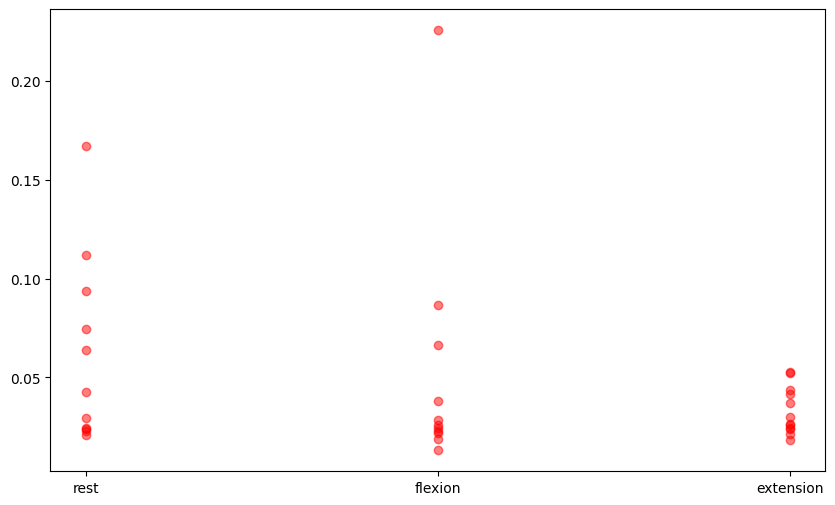

In [29]:
classes = ['rest', 'flexion', 'extension']

rest_ds = full_ds.loc[full_ds['class'] == 'rest']
flexion_ds = full_ds.loc[full_ds['class'] == 'flexion']
extension_ds = full_ds.loc[full_ds['class'] == 'extension']

rest_ds = remove_outliers(rest_ds, 'SENSOR0_MAV')
rest_ds = remove_outliers(rest_ds, 'SENSOR1_MAV')
rest_ds = remove_outliers(rest_ds, 'SENSOR2_MAV')
rest_ds = remove_outliers(rest_ds, 'SENSOR3_MAV')

extension_ds = remove_outliers(extension_ds, 'SENSOR0_MAV')
extension_ds = remove_outliers(extension_ds, 'SENSOR1_MAV')
extension_ds = remove_outliers(extension_ds, 'SENSOR2_MAV')
extension_ds = remove_outliers(extension_ds, 'SENSOR3_MAV')

flexion_ds = remove_outliers(flexion_ds, 'SENSOR0_MAV')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR1_MAV')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR2_MAV')
flexion_ds = remove_outliers(flexion_ds, 'SENSOR3_MAV')


plt.figure(figsize=(10, 6))
plt.scatter(rest_ds['class'], rest_ds['SENSOR1_MAV'], c='red', label='Class 1', alpha=0.5)
plt.scatter(flexion_ds['class'], flexion_ds['SENSOR1_MAV'], c='red', label='Class 1', alpha=0.5)
plt.scatter(extension_ds['class'], extension_ds['SENSOR1_MAV'], c='red', label='Class 1', alpha=0.5)